# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and play with it yourself. __DO NOT__ request access to this tutorial.


# Install detectron2

In [ ]:
!pip install neptune-client
!pip install psutil
!pip install neptune-contrib
!pip install neptune-contrib[all]


In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

In [ ]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
# im = cv2.imread("./input.jpg")
# im2 = cv2.imread('/content/drive/My Drive/InterPet_Stuff/Copie de img370.png')
# # # im3 = cv2.imread('/content/drive/My Drive/InterPet_Stuff/Copie de img019.png')
# cv2_imshow(im2)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
# cfg = get_cfg()
# # add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# predictor = DefaultPredictor(cfg)
# outputs = predictor(im2)

In [ ]:
# # look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
# print(outputs["instances"].pred_classes)
# print(outputs["instances"].pred_boxes)

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
# v = Visualizer(im2[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
# out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2_imshow(out.get_image()[:, :, ::-1])

# Train on a custom dataset

In this section, we show how to train an existing detectron2 model on a custom dataset in a new format.

We use [the balloon segmentation dataset](https://github.com/matterport/Mask_RCNN/tree/master/samples/balloon)
which only has one class: balloon.
We'll train a balloon segmentation model from an existing model pre-trained on COCO dataset, available in detectron2's model zoo.

Note that COCO dataset does not have the "balloon" category. We'll be able to recognize this new class in a few minutes.

## Prepare the dataset

In [ ]:
os.mkdir("cats")
os.mkdir("cats/train")
os.mkdir("cats/valid")

In [ ]:
# # download, decompress the data
# !wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
# !unzip balloon_dataset.zip > /dev/null

In [ ]:
!unzip "/content/drive/My Drive/InterPet_Stuff/train/all_train.zip" -d /content/cats/train/
!unzip "/content/drive/My Drive/InterPet_Stuff/valid/all_valid.zip" -d /content/cats/valid/
!unzip "/content/cats/train/Copie de train_segmentation.zip" -d /content/cats/train/
!unzip "/content/cats/valid/test_segmentation.zip" -d /content/cats/valid/

Archive:  /content/drive/My Drive/InterPet_Stuff/train/all_train.zip
  inflating: /content/cats/train/Copie de segmentation_train_28Oct2020_v1train.json  
  inflating: /content/cats/train/Copie de train_segmentation.zip  
Archive:  /content/drive/My Drive/InterPet_Stuff/valid/all_valid.zip
  inflating: /content/cats/valid/Copie de segmentation_test29Oct2020_13h11m(1).json  
  inflating: /content/cats/valid/test_segmentation.zip  
Archive:  /content/cats/train/Copie de train_segmentation.zip
Created by ZIP Extractor v4.22 on 2020-10-28
  inflating: /content/cats/train/cat_60.jpg  
  inflating: /content/cats/train/cat_59  
  inflating: /content/cats/train/cat_58  
  inflating: /content/cats/train/cat_57.jpeg  
  inflating: /content/cats/train/cat_56.jpeg  
  inflating: /content/cats/train/cat_55.jpeg  
  inflating: /content/cats/train/cat_54.jpeg  
  inflating: /content/cats/train/cat_53.jpeg  
  inflating: /content/cats/train/cat_52.jpeg  
  inflating: /content/cats/train/cat_51.jpeg  


Register the balloon dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).
Here, the dataset is in its custom format, therefore we write a function to parse it and prepare it into detectron2's standard format. User should write such a function when using a dataset in custom format. See the tutorial for more details.


In [ ]:
from detectron2.structures import BoxMode

def get_balloon_dicts2(img_dir):


    limbs = ["ear_r", "ear_l", "fpaw_r", "fpaw_l", "bpaw_r", "bpaw_l", "head", "tail", "whiter"]
    # print(f'We are searching for : {limb}')
    err_f,err_cat = 0, 0 #### count the number of unreadable files
    if img_dir == "cats/train":
      json_file = os.path.join(img_dir, "Copie de segmentation_train_28Oct2020_v1train.json")
    else:
      json_file = os.path.join(img_dir, "Copie de segmentation_test29Oct2020_13h11m(1).json")


    with open(json_file) as f:
        imgs_anns = json.load(f)
    dataset_dicts = []
    for idx, v in enumerate(imgs_anns['_via_img_metadata'].values()):
        record = {}
        
        try:
          filename = os.path.join(img_dir, v['filename'])
          height, width = cv2.imread(filename).shape[:2]
        except:
          # err_f = err_f + 1
        # print("filename without name : ", idx)
          continue
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
  
        annos = v["regions"]
        objs = []
        # for _, anno in annos.items():
        for anno in annos:
            # assert not anno["region_attributes"]
            anno_s = anno["shape_attributes"]
            px = anno_s["all_points_x"]
            py = anno_s["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]
        #print("new anno : ", anno)
            try:
              lim = anno["region_attributes"]["CAT"]
            except:
              try:
                lim = anno["region_attributes"]["cat"]
              except:
                err_cat = err_cat + 1
            id = 0
            if lim == "head":
              id = 0
            elif lim == "tail":
              id = 1
            elif lim == "fpaw_r":
              id = 2
            elif lim == "fpaw_l":
              id = 3
            elif lim == "ear_r":
              id = 4
            elif lim == "ear_l":
              id = 5
            elif lim == "whiter":
              id = 6
            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": id,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

for d in ["train", "valid"]:
    DatasetCatalog.register("cats_" + d, lambda d=d: get_balloon_dicts2("cats/" + d))
    MetadataCatalog.get("cats_" + d).set(thing_classes=["head", "tail", "fpaw_r", "fpaw_l","ear_r","ear_l","whiter"])
cats_metadata = MetadataCatalog.get("cats_train")


In [ ]:
# dm = get_balloon_dicts2("cats/train")

In [ ]:
# len(dm)

In [ ]:
# [DatasetCatalog.remove(x) for x in [ 
# 'cats_train',
#  'cats_valid']]

In [ ]:
# [MetadataCatalog.remove(x) for x in ['cats_train',
#  'cats_valid']]

In [ ]:
# DatasetCatalog.get('balloon_train')

To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:



## Train!

Now, let's fine-tune a COCO-pretrained R50-FPN Mask R-CNN model on the balloon dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU, or ~2 minutes on a P100 GPU.


In [ ]:
# os.mkdir("val_img_pred")
os.mkdir("val_img_pred")


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
import json
import neptune
import neptunecontrib
from neptunecontrib import create_experiment_from_json
import shutil

eval_res_seg = {"eval_precision_head":0,"eval_precision_fpaw_r":0,"eval_precision_fpaw_l":0 ,"eval_precision_tail":0,"eval_precision_ear_r":0,"eval_precision_ear_l":0,"eval_precision_whiter":0}
eval_res_box = {"head":28.497,"fpaw_r":1.841,"fpaw_l":8.137,"tail":20.267,"ear_r":17.804,"ear_l":14.775,"whiter":1.622}

val_img_dir = "/content/val_img_pred"
out_dir = "/content/output"

classes = 7
iterations = [2400]
batch_size_per_img = 512

coco = "COCO-InstanceSegmentation/"
bag_models = [
##"mask_rcnn_R_101_C4_3x.yaml",   not available in model-zoo
##"mask_rcnn_R_50_C4_3x.yaml",
##"mask_rcnn_R_50_DC5_3x.yaml",
##"mask_rcnn_X_101_32x8d_FPN_3x.yaml"
        # "COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml",
        # "COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_3x.yaml",
        #########"COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml",
        # "COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x.yaml",
        # "COCO-InstanceSegmentation/mask_rcnn_R_101_DC5_3x.yaml",
        # "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml",
        "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
]

# exp_number = 5
# model = coco + bag_models[exp_number - 5]
# print(model)

for it in iterations:
  print(it)
  for each in enumerate(bag_models):
    print(each[1])
    exp_number = each[0] + 16
    print(exp_number)
    # try:
    training(exp_number,each[1],it,batch_size_per_img)
      # wrap_data(classes,it,each[1],batch_size_per_img,val_img_dir,exp_number)
    # except:
      # continue

In [ ]:
pred = inf(cfg,12,trainer)
get_imgs(cfg,12,trainer,pred)
Eval(cfg,trainer,12)
wrap_data(classes,1200,"COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml",batch_size_per_img,val_img_dir,12)

In [ ]:
# m,c = training(1,"COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml",20,216)

In [ ]:
def training(number,model,iterations,batch_size_per_img):
  cfg = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file(model))
  cfg.DATASETS.TRAIN = ("cats_train",)
  cfg.DATASETS.TEST = ()
  cfg.DATALOADER.NUM_WORKERS = 2
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model)  # Let training initialize from model zoo
  cfg.SOLVER.IMS_PER_BATCH = 2
  cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
  cfg.SOLVER.MAX_ITER = iterations    # 600 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
  cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = batch_size_per_img   # faster, and good enough for this toy dataset (default: 512)
  cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)

  os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
  trainer = DefaultTrainer(cfg) 
  trainer.resume_or_load(resume=False)
  trainer.train()
  # return trainer.train()
  # return trainer,cfg
  # return cfg, trainer
  inf(cfg,number,trainer,iterations,model)



In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:



In [ ]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
def inf(cfg,n,trainer,it,model):
  cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
  predictor = DefaultPredictor(cfg)
  # return predictor
  get_imgs(cfg,n,trainer,predictor,it,model)


Then, we randomly select several samples to visualize the prediction results.

In [ ]:


def get_imgs(cfg,n,trainer,predictor,it,model):
  dataset_dicts = get_balloon_dicts2("cats/valid")
# for d in random.sample(dataset_dicts, 3):   
  for m in range(0,15):
      d = dataset_dicts[m]
      im = cv2.imread(d["file_name"])
      outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
      v = Visualizer(im[:, :, ::-1],
                   metadata=cats_metadata, 
                   scale=1, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
      )
      out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
      img = out.get_image()[:, :, ::-1]
      filename = "valid_" + str(m+1) + ".png"
    # cv2.imwrite(filename, img) 
      cv2.imwrite(os.path.join(val_img_dir , filename), img)
    # cv2.waitKey(0)
      #cv2_imshow(img)
  Eval(cfg,trainer,n,it,model)

We can also evaluate its performance using AP metric implemented in COCO API.
This gives an AP of ~70. Not bad!

In [ ]:
eval_res_seg

In [ ]:
def Eval(cfg,trainer,n,it,model):
  global eval_res_seg
  evaluator = COCOEvaluator("cats_valid", ("bbox", "segm"), False, output_dir="./output/")
  val_loader = build_detection_test_loader(cfg, "cats_valid")
  # print(inference_on_dataset(trainer.model, val_loader, evaluator))
  a = inference_on_dataset(trainer.model,val_loader,evaluator)

  eval_res_seg = {"eval_precision_head":round(a["segm"]["AP-head"],3),"eval_precision_fpaw_r":round(a["segm"]["AP-fpaw_r"],3),"eval_precision_fpaw_l":round(a["segm"]["AP-fpaw_l"],3) ,"eval_precision_tail":round(a["segm"]["AP-tail"],3),"eval_precision_ear_r":round(a["segm"]["AP-ear_r"],3),"eval_precision_ear_l":round(a["segm"]["AP-ear_l"],3),"eval_precision_whiter":round(a["segm"]["AP-whiter"],3)}
  wrap_data(it,model,n)
# another equivalent way to evaluate the model is to use `trainer.test`

In [ ]:
a = inference_on_dataset(trainer.model, val_loader, evaluator)

# Neptune

In [ ]:
def wrap_data(iterations,model,exp_number):
  global classes
  global batch_size_per_img
  global val_img_dir

  metrics_file = "/content/output/metrics.json"

  tweets = []
  for line in open(metrics_file, 'r'):
      tweets.append(json.loads(line))
  data = {
  "filepath": "/content/data.json",
  "name": 'danielfmfurlan/sandbox',
  "description": "json tracking experiment",
  "api_token" : "eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiY2ViMWVhOWItZmE5NS00NGI5LWFiN2QtYmNmYTg3OTFjMzFmIn0=",
  "params": {
    "train_images" : 60,
    "number_classes" : classes,
    "processed_imgs": 53,
    "ROI_HEADS_BATCH_SIZE_PER_IMAGE" : batch_size_per_img,
    "iterations": iterations,
    "model":model
  },
  "properties": {
    "data_version": "1231ffwefef9",
    "data_path": "data/train.csv"
  },
  "images":{
    "filepath":val_img_dir  
  },
  "tags": [
    "resnet",
    "no_preprocessing"
  ],
  "upload_source_files": [
    "run.sh"
  ],
  "log_metric": {
    "iteration":[],
    "total_loss": { ### x
      "loss": [] #### y
    },
    "mask_accuracy": {
      "acc": []
    },
    "mask_fp":{
        "fp":[]        
    },
    "mask_fn":{
        "fn":[]        
    }
    }}

  for each in tweets: 
    data["log_metric"]["total_loss"]["loss"].append(each["total_loss"])
    data["log_metric"]["iteration"].append(each["iteration"])

    data["log_metric"]["mask_accuracy"]["acc"].append(each['mask_rcnn/accuracy'])
    data["log_metric"]["mask_fn"]["fn"].append(each['mask_rcnn/false_negative'])
    data["log_metric"]["mask_fp"]["fp"].append(each['mask_rcnn/false_positive'])

  with open('data.json', 'w') as outfile:
      json.dump(data, outfile)

  nept(exp_number,data)


In [ ]:
data

In [ ]:

def nept(exp_number,data):
  neptune.init(
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiY2ViMWVhOWItZmE5NS00NGI5LWFiN2QtYmNmYTg3OTFjMzFmIn0=",
    project_qualified_name="danielfmfurlan/sandbox"

  )
  # NAME = 'detectron2 : exp. ' + exp_number
  NAME = 'detectron2 : exp. ' + str(exp_number)
  neptune.create_experiment(name=NAME,
                          params = data["params"]
                          )
  log_data(data)

In [ ]:
def log_data(data):

  for key in data['log_metric'].keys():
    print(key)
    if key != "iteration":
      for each in data["log_metric"][key].keys():
        for elem in data["log_metric"][key][each]:
        
          neptune.log_metric(key,elem)


  for each in eval_res_seg.items():
    neptune.log_metric(each[0],each[1])
  log_imgs()



In [ ]:
def log_imgs():

  for filename in os.listdir(val_img_dir):
    if filename.endswith(".png"):
      neptune.log_image("val imgs pred", os.path.join(val_img_dir,filename), image_name = filename)
  log_artif()


In [ ]:
def log_artif():
  for each in os.listdir(out_dir):
    if "lock" not in each and "events" not in each and each != "coco_instances_results.json":
      neptune.log_artifact(os.path.join(out_dir,each))
  del_dirs()

Delete folders to rerun all scripts

In [ ]:
# out_dir = "/content/output"
  # val_img_dir = "/content/val_img_pred"
def del_dirs():
  shutil.rmtree(out_dir)

  for filename in os.listdir(val_img_dir):
    os.remove(os.path.join(val_img_dir,filename))
  stop_nept()

In [ ]:
def stop_nept():
  neptune.stop()

In [ ]:
from PIL import Image 
from numpy import asarray 
x = []
dir = "/content/cats/train"
for files in os.listdir(dir):
  if "cat" in files:
    img = Image.open(os.path.join(dir,files))
     
# asarray() class is used to convert 
# PIL images into NumPy arrays 
    numpydata = asarray(img) 
    x.append(numpydata)
  
# <class 'numpy.ndarray'> 
print(type(x)) 
  # 
#  shape 
for each in x:
  print(len(each))
len(x[0])
# print(x.shape) 
x = np.array(x)
type(x)

In [ ]:
import shap
import numpy as np

x_train = x

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

# Other types of builtin models

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

# Run panoptic segmentation on a video

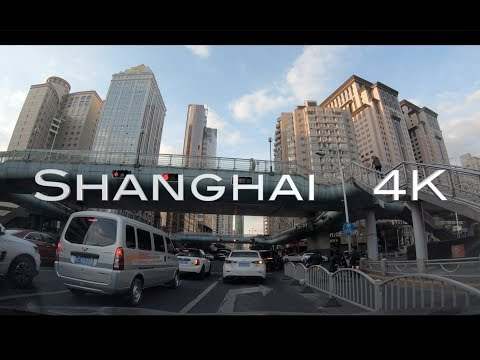

In [ ]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("ll8TgCZ0plk", width=500)
display(video)

In [ ]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=ll8TgCZ0plk -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4

In [ ]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

In [ ]:
# Download the results
from google.colab import files
files.download('video-output.mkv')